<a href="https://colab.research.google.com/github/kashifkhan9555/WHO_Life_expectancy/blob/main/life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - life expectancy



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

# **Problem Statement**


**The life expectancy dataset has been collected from the World Health Organization (WHO) data repository and from United Nation (UN) website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It considers data from year 2000 to 2015 for 193 countries, containing 22 columns and 2938 rows. All predicting variables was divided into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors.**

## ***1. Know Your Data***

### Import Libraries

In [88]:
# necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
!pip install statsmodels
import statsmodels.formula.api as smf


### Dataset Loading

In [4]:
# Load Dataset

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets/Life Expectancy Data.csv')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [5]:
# prompt:  Dataset First Look

df.head()


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

df.shape


(2938, 22)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#### Duplicate Values

In [8]:
# prompt: duplicate values

df.duplicated().sum()


0

#### Missing Values/Null Values

In [9]:
# prompt: # Missing Values/Null Values Count

df.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income_composition of resources    167
Schooling                          163
dtype: int64

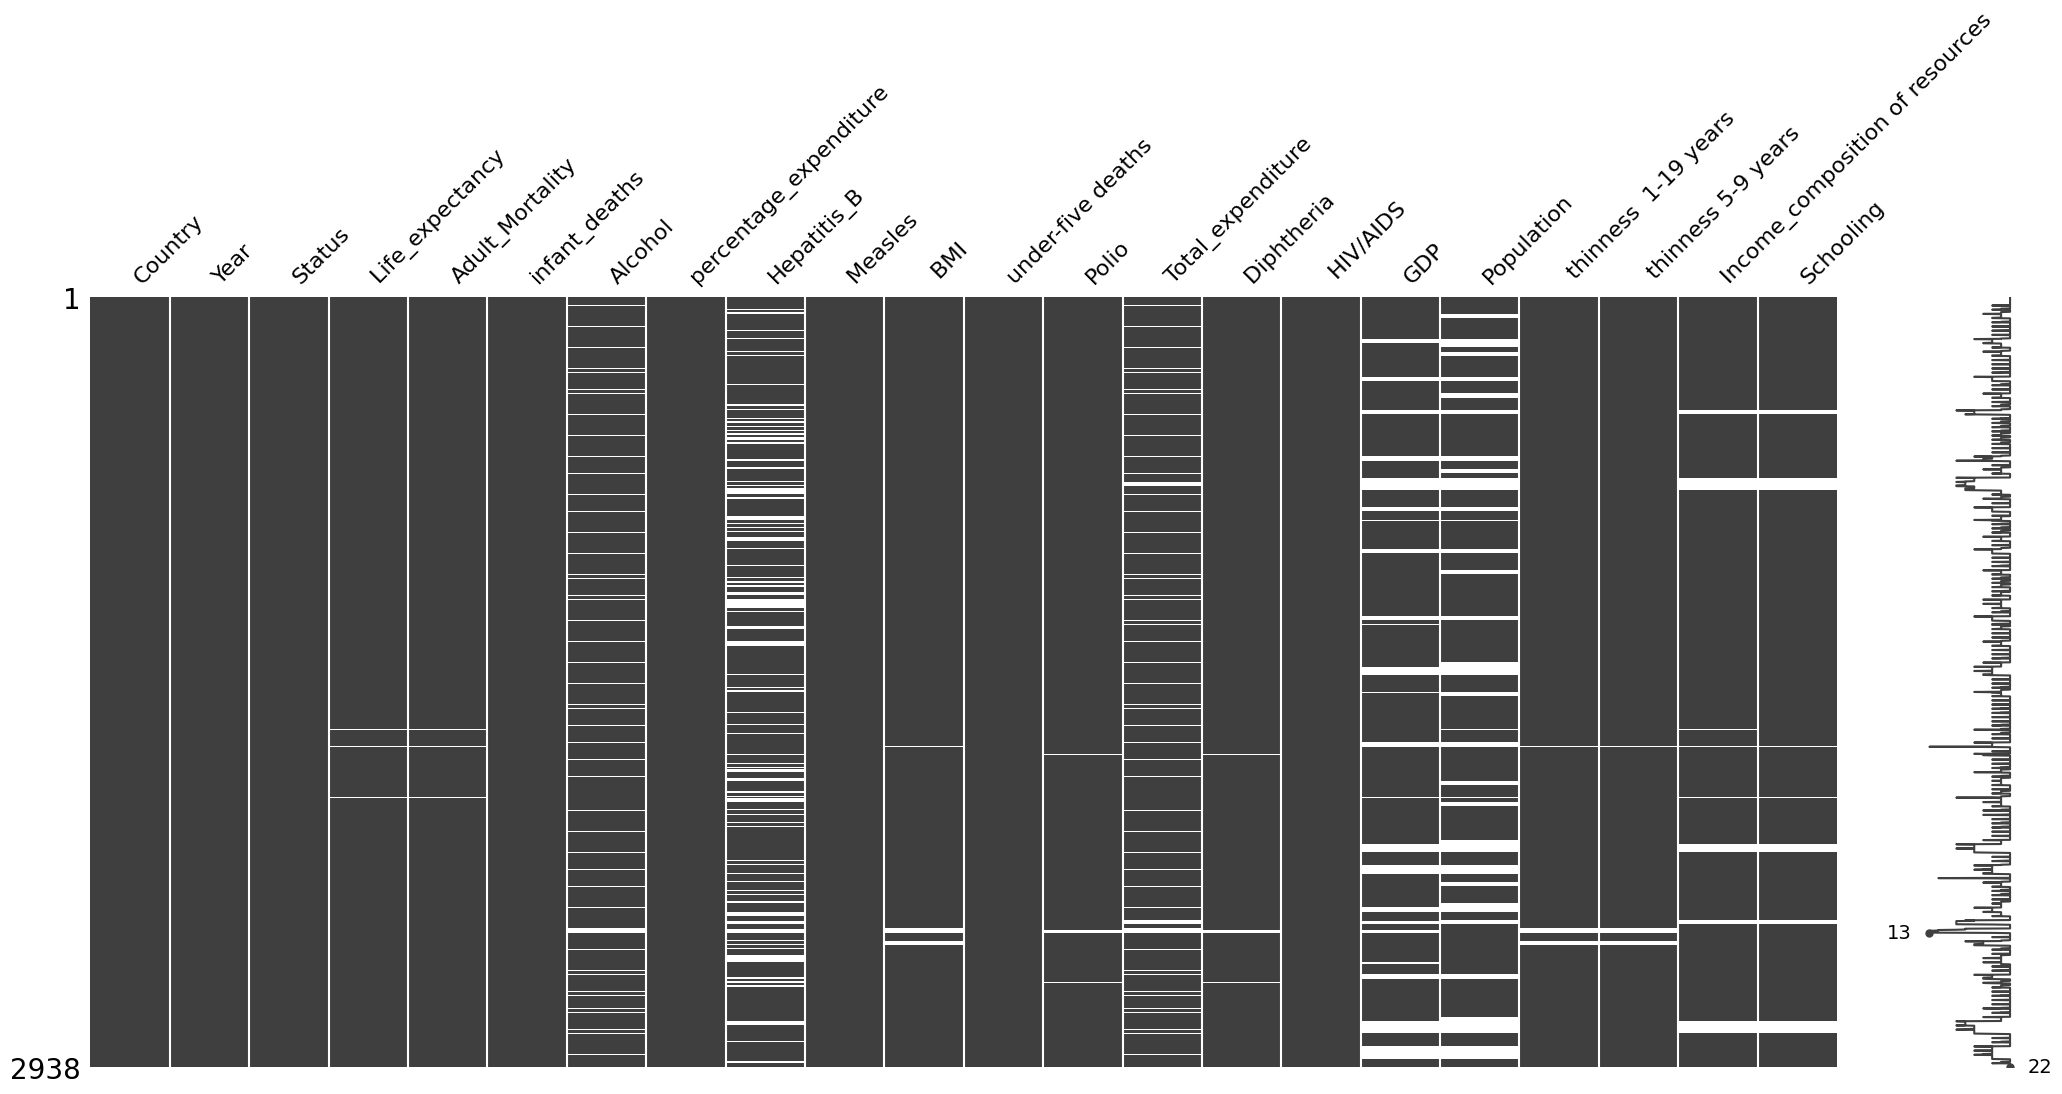

In [10]:
# Visualizing the missing values

import matplotlib.pyplot as plt
import missingno as msno

# Visualizing the missing values
msno.matrix(df)
plt.show()


In [11]:
# prompt: remove null values

df = df.dropna()


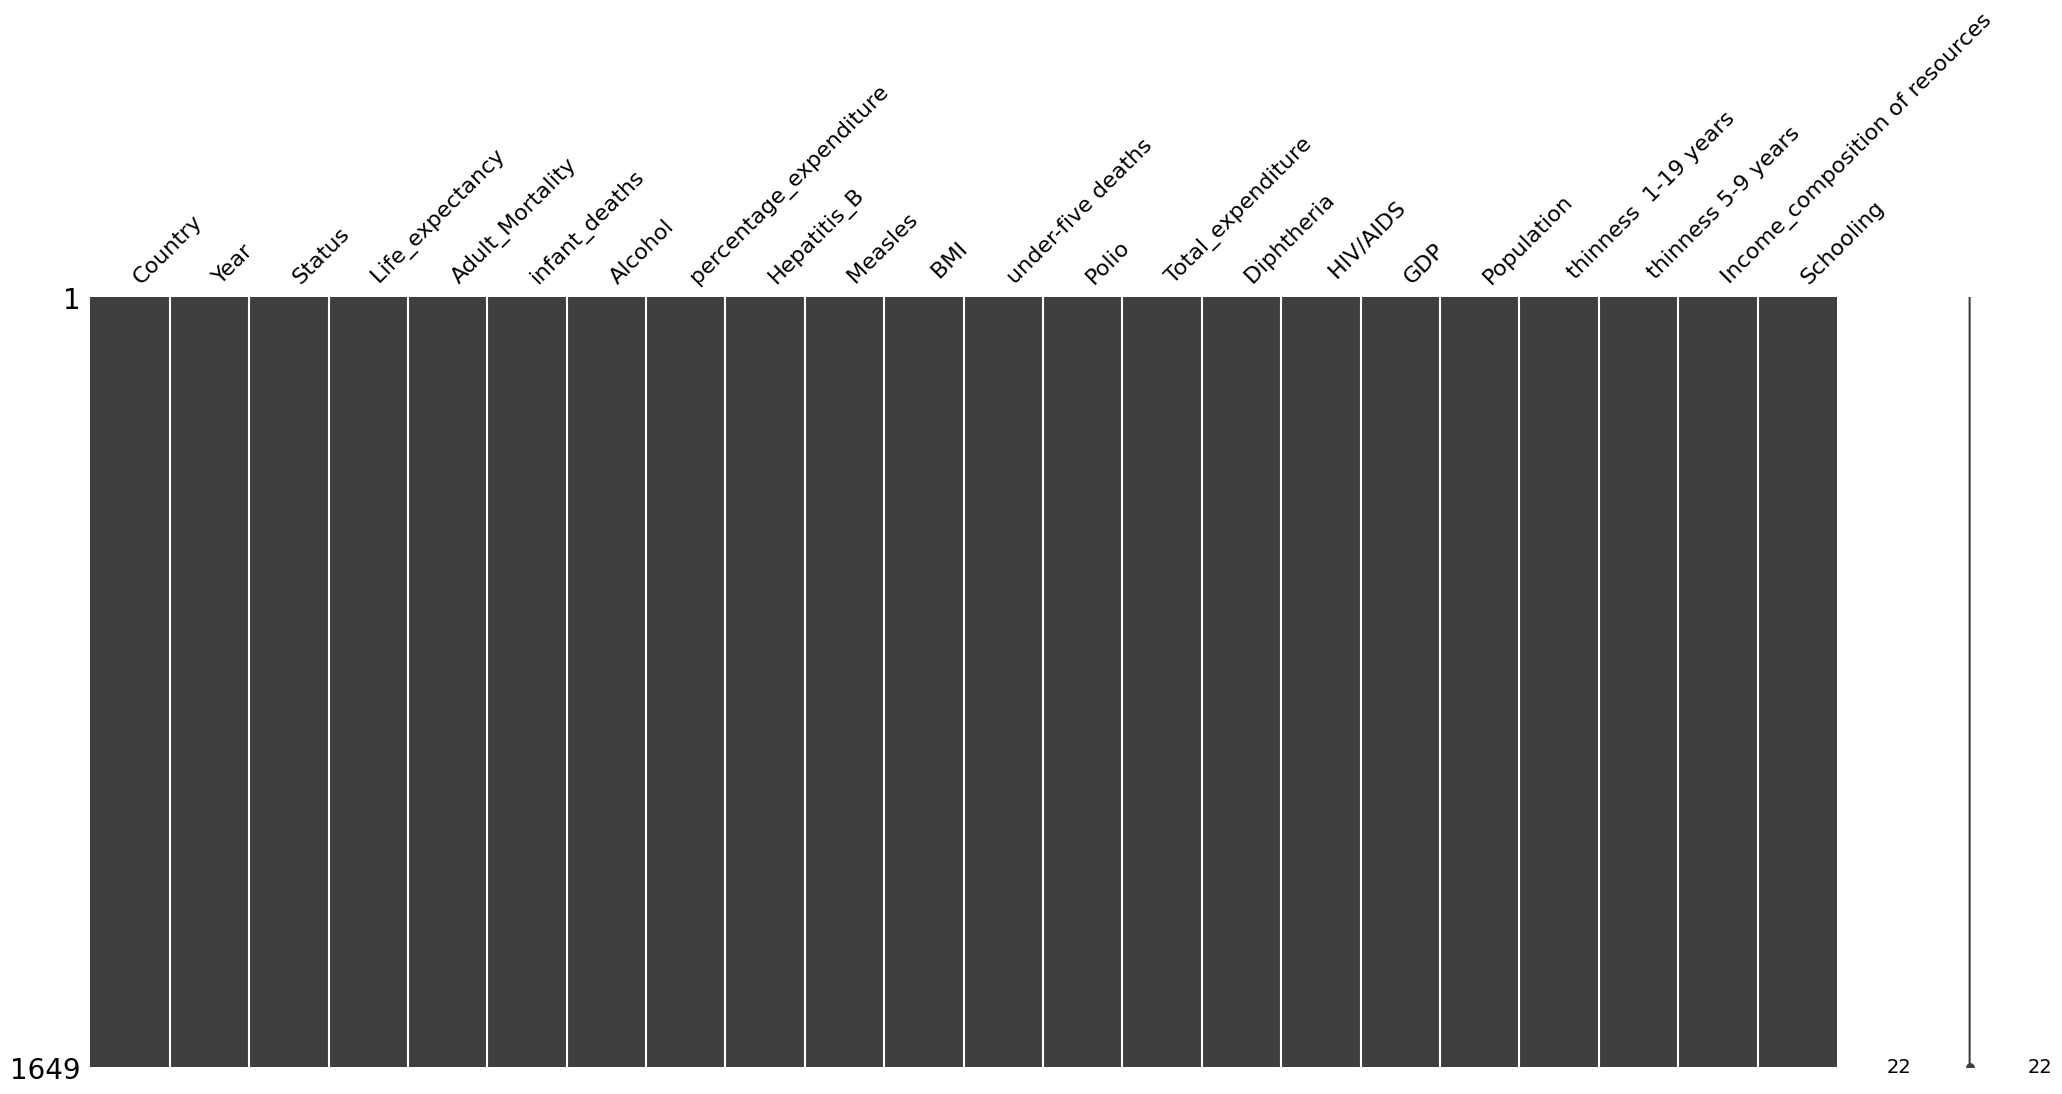

In [12]:
# Visualizing the missing values

import matplotlib.pyplot as plt
import missingno as msno

# Visualizing the missing values
msno.matrix(df)
plt.show()

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns

df.columns


Index(['Country', 'Year', 'Status', 'Life_expectancy ', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total_expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition of resources', 'Schooling'],
      dtype='object')

In [14]:
# Dataset Describe

df.describe()


,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


### Variables Description

Count: This indicates the number of non-null values for each variable. For instance, there are 1649 non-null values for each variable in your dataset.

Mean: This represents the average value of each variable across all observations.

Standard Deviation (Std): This measures the dispersion or spread of the values around the mean. It indicates how much variation or dispersion exists from the average.

Minimum (Min): This is the smallest value observed for each variable.

25th Percentile (25%): This is the value below which 25% of the observations fall. Also known as the first quartile.

50th Percentile (Median): This is the value below which 50% of the observations fall. Also known as the second quartile or median.

75th Percentile (75%): This is the value below which 75% of the observations fall. Also known as the third quartile.

Maximum (Max): This is the largest value observed for each variable.

### Check Unique Values for each variable.

In [15]:
# prompt: checking unique values

for col in df.columns:
  print(f"Unique values for {col}: {df[col].unique()}")


Unique values for Country: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'N

## 3. ***Data Wrangling***

### Data Wrangling Code

## ***4. Data Vizualization***

#### Chart - 1

<ipython-input-18-0bf7d31170a8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


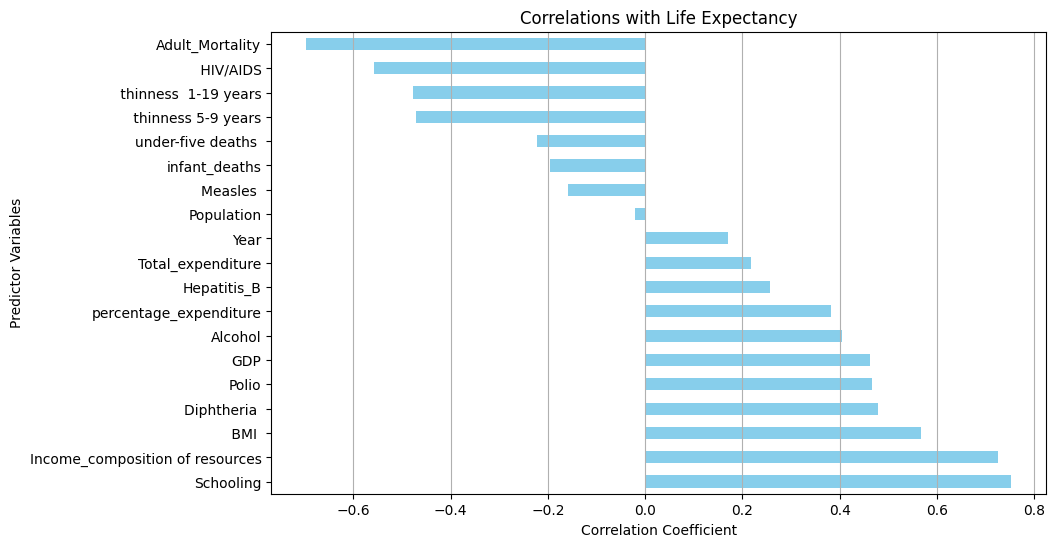

In [18]:
# Replace 'Life_expectancy ' with the correct column name for life expectancy
life_expectancy_column = 'Life_expectancy '

# Calculate correlation matrix
corr_matrix = df.corr()

# Extract correlations with life expectancy
life_expectancy_corr = corr_matrix[life_expectancy_column].drop(life_expectancy_column)

# Sort correlations in descending order
life_expectancy_corr_sorted = life_expectancy_corr.sort_values(ascending=False)

# Plot simple horizontal bar plot of correlations
plt.figure(figsize=(10, 6))
life_expectancy_corr_sorted.plot(kind='barh', color='skyblue')
plt.title('Correlations with Life Expectancy')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Predictor Variables')
plt.grid(axis='x')
plt.show()

#### Chart - 2

In [19]:
#using plotly draw count plot for df['Year']
fig = px.histogram(df, x='Year', color='Year', title='Count Plot for Year')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Year</b>', x=0.5)
)

fig.show()

#### Chart - 3

In [20]:
#using plotly draw line plot to show the trend of life expectancy over the years
fig = px.line(df.sort_values(by='Year'), x='Year', y='Life_expectancy ',animation_frame='Country',animation_group='Year',color='Country', title='Trend of Life Expectancy Over the Years')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5)
)

fig.show()

#### Chart - 4

In [21]:
#using plotly draw count plot for df['Status'] and color each bar with different color
fig = px.histogram(df, x='Status', color='Status', title='Count Plot for Status of Country')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Count Plot for Status of Country</b>', x=0.5)
)

fig.show()

#### Chart - 5

#2. Should a country having a lower life expectancy value (<65) increase its healthcare expenditure in order to improve its average lifespan?

In [22]:
# Filter data for countries with life expectancy below 65
low_life_expectancy_df = df[df['Life_expectancy '] < 65]

# Group data by status and year, calculate mean healthcare expenditure
healthcare_expenditure_by_status_year = low_life_expectancy_df.groupby(['Status', 'Year'])['Total_expenditure'].mean().reset_index()

# Plot line chart
fig = px.line(data_frame=healthcare_expenditure_by_status_year, x='Year', y='Total_expenditure', color='Status',
              title='Average Healthcare Expenditure for Countries with Life Expectancy Below 65 Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Healthcare Expenditure (USD)',
                  legend_title='Status', legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
                  title=dict(x=0.5))
fig.show()



# Interpretation
# Based on the bar chart, we can observe that developing countries with life expectancy below 65 tend to have lower average healthcare expenditure compared to developed countries. This suggests that increasing healthcare expenditure could potentially improve life expectancy in these countries.


#### Chart - 6

## 3. How does Infant and Adult mortality rates affect life expectancy?

In [23]:
# # Scatter plot for Infant Mortality Rate vs Life Expectancy
# plt.figure(figsize=(10, 6))
# plt.scatter(df['infant_deaths'], df['Life_expectancy '], color='blue', alpha=0.5)
# plt.title('Infant Mortality Rate vs Life Expectancy')
# plt.xlabel('Infant Mortality Rate')
# plt.ylabel('Life Expectancy')
# plt.grid(True)
# plt.show()

# # Scatter plot for Adult Mortality Rate vs Life Expectancy
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Adult_Mortality'], df['Life_expectancy '], color='red', alpha=0.5)
# plt.title('Adult Mortality Rate vs Life Expectancy')
# plt.xlabel('Adult Mortality Rate')
# plt.ylabel('Life Expectancy')
# plt.grid(True)
# plt.show()

#using plotly to visualize scatter ploy of Life expectancy vs Adult Mortality for countries over years
fig = px.scatter(df.sort_values(by='Year'), x='Life_expectancy ', y='Adult_Mortality',color='Country', size='Year', title='Life expectancy vs Adult Mortality for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Adult Mortality for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()


In [24]:
#using plotly to visualize scatter ploy of Life expectancy vs Infant deaths for Countries over Years
fig = px.scatter(df.sort_values(by='Year'), x='Life_expectancy ', y='infant_deaths',color='Country', size='Year', title='Life expectancy vs Infant deaths for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Infant deaths for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()

#### Chart - 7

## 4. Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

In [25]:
# Chart - 8 visualization code

# Create a scatter plot to visualize the relationship between life expectancy and alcohol consumption
fig = px.scatter(df, x='Life_expectancy ', y='Alcohol',
                 title='Life Expectancy vs Alcohol Consumption',
                 labels={'Life_expectancy ': 'Life Expectancy', 'Alcohol': 'Alcohol Consumption'},
                 trendline='ols')  # Add an ordinary least squares regression trendline

# Update layout to center the title
fig.update_layout(title_text='<b>Life Expectancy vs Alcohol Consumption</b>', title_x=0.5)

# Show the plot
fig.show()

this creates a scatter plot that shows how life expectancy is related to alcohol consumption, helping us understand whether there's a positive or negative correlation between the two variables.

#### Chart - 8

## What is the impact of schooling on the lifespan of humans?

Correlation coefficient between life expectancy and schooling years: 0.7519754627366979


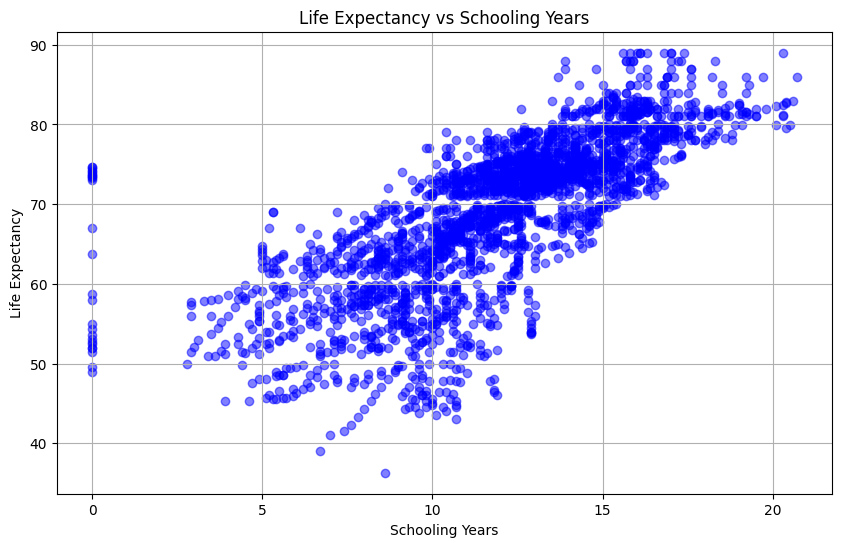

In [26]:
import matplotlib.pyplot as plt
# Calculate the correlation coefficient between life expectancy and schooling years
correlation = df['Life_expectancy '].corr(df['Schooling'])

# Print the correlation coefficient
print(f"Correlation coefficient between life expectancy and schooling years: {correlation}")

# Create a scatter plot to visualize the relationship between life expectancy and schooling years
plt.figure(figsize=(10, 6))
plt.scatter(df['Schooling'], df['Life_expectancy '], color='blue', alpha=0.5)
plt.title('Life Expectancy vs Schooling Years')
plt.xlabel('Schooling Years')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


This scatter plot will allow you to observe the relationship between schooling (measured in years of education) and life expectancy. If there is a positive correlation between schooling and life expectancy, you would expect to see a general trend where higher levels of schooling correspond to higher life expectancies. Conversely, a negative correlation would show lower life expectancies associated with lower levels of schooling.

#### Chart - 9

## 7. Do densely populated countries tend to have lower life expectancy?

In [27]:
# Calculate the densely populated country
dense_country = df.loc[df['Population'].idxmax(), 'Country']

# Create a scatter plot to visualize the relationship between life expectancy and population density
fig = px.scatter(df, x='Life_expectancy ', y='Population',
                 title='Life Expectancy vs Population Density',
                 labels={'Life_expectancy ': 'Life Expectancy', 'Population': 'Population Density'},
                 trendline='ols')  # Add an ordinary least squares regression trendline

# Annotate the point corresponding to the densely populated country
fig.add_annotation(x=df.loc[df['Country'] == dense_country, 'Life_expectancy '].values[0],
                   y=df.loc[df['Country'] == dense_country, 'Population'].values[0],
                   text=dense_country,
                   showarrow=True,
                   arrowhead=1)

# Update layout to center the title
fig.update_layout(title_text='<b>Life Expectancy vs Population Density</b>', title_x=0.5)

# Show the plot
fig.show()







#### Chart - 10

## What is the impact of Immunization coverage on life Expectancy?

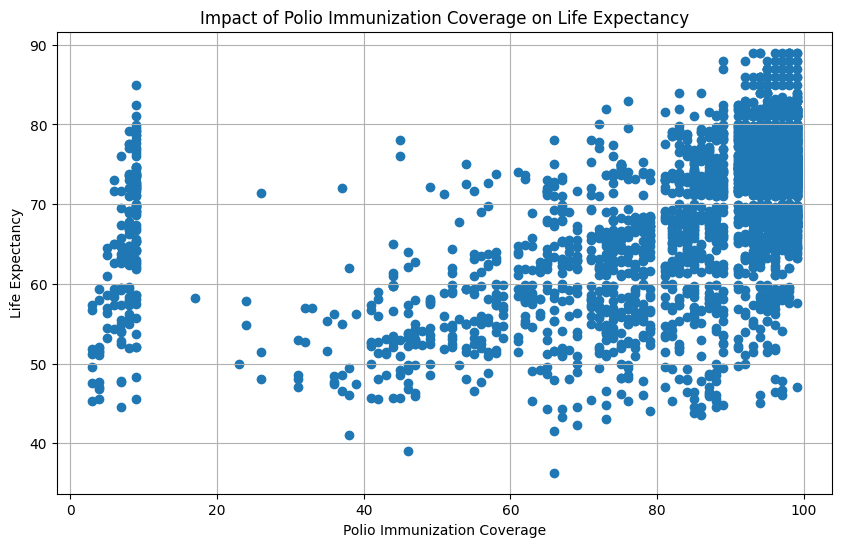

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Polio'], df['Life_expectancy '])
plt.title('Impact of Polio Immunization Coverage on Life Expectancy')
plt.xlabel('Polio Immunization Coverage')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


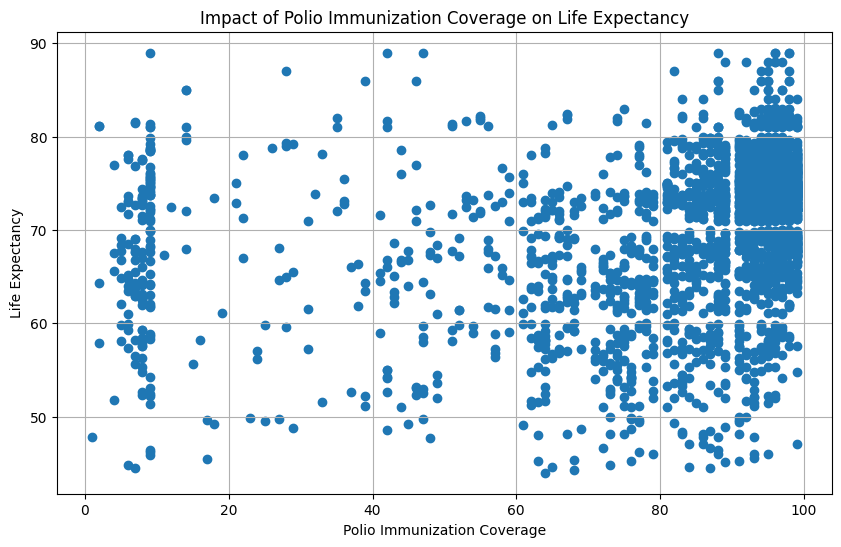

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Hepatitis_B'], df['Life_expectancy '])
plt.title('Impact of Polio Immunization Coverage on Life Expectancy')
plt.xlabel('Polio Immunization Coverage')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

## Calculate the average immunization coverage.

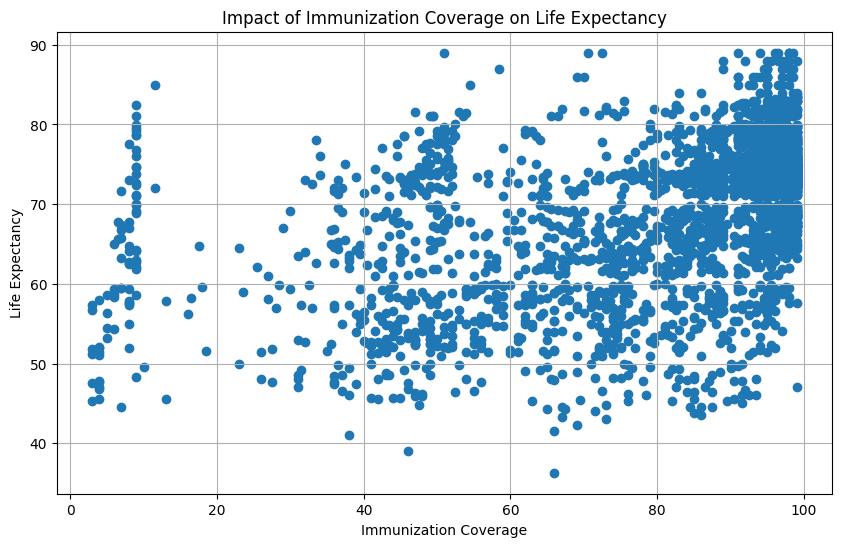

In [48]:
df['Immunization_coverage'] = df[['Polio', 'Hepatitis_B']].mean(axis=1)

# Visualize the relationship between immunization coverage and life expectancy
plt.figure(figsize=(10, 6))
plt.scatter(df['Immunization_coverage'], df['Life_expectancy '])
plt.title('Impact of Immunization Coverage on Life Expectancy')
plt.xlabel('Immunization Coverage')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


In [30]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

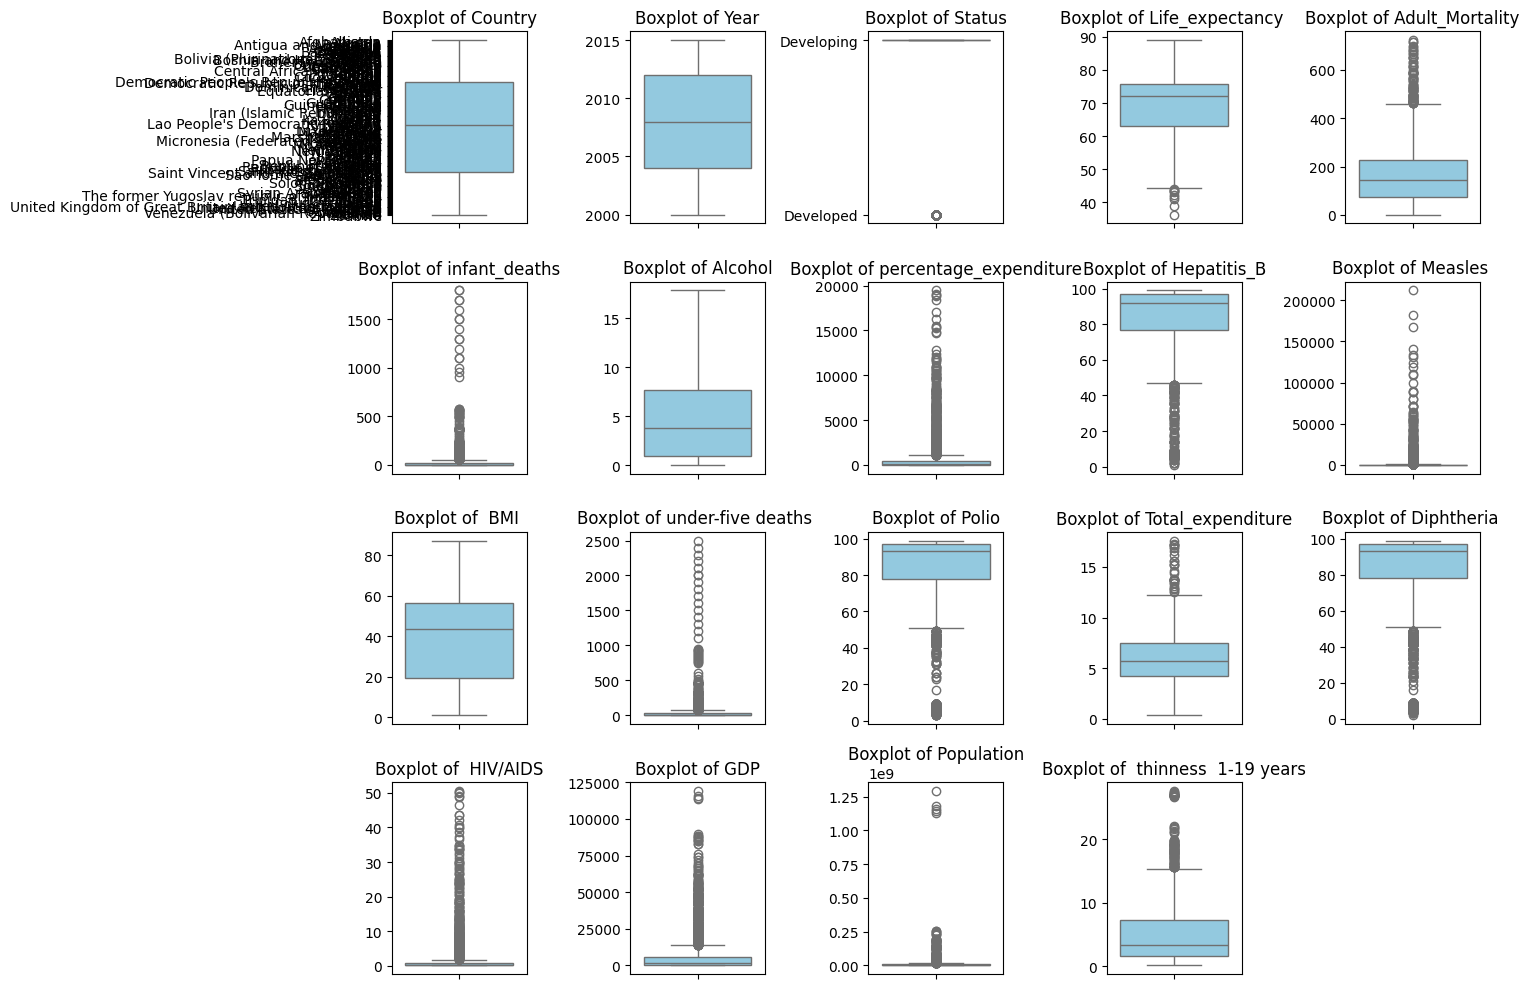

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(15, 10))

# Limit the number of columns to fit within the layout
columns_to_plot = df.columns[:19]  # Select the first 19 columns

# Create boxplots for each selected column
for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 5, i + 1)  # Adjust the subplot layout
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')  # Remove y-axis label for better clarity
    plt.xlabel('')  # Remove x-axis label for better clarity

# Adjust the layout and padding
plt.tight_layout()

# Show the plot
plt.show()




### After handling outliers

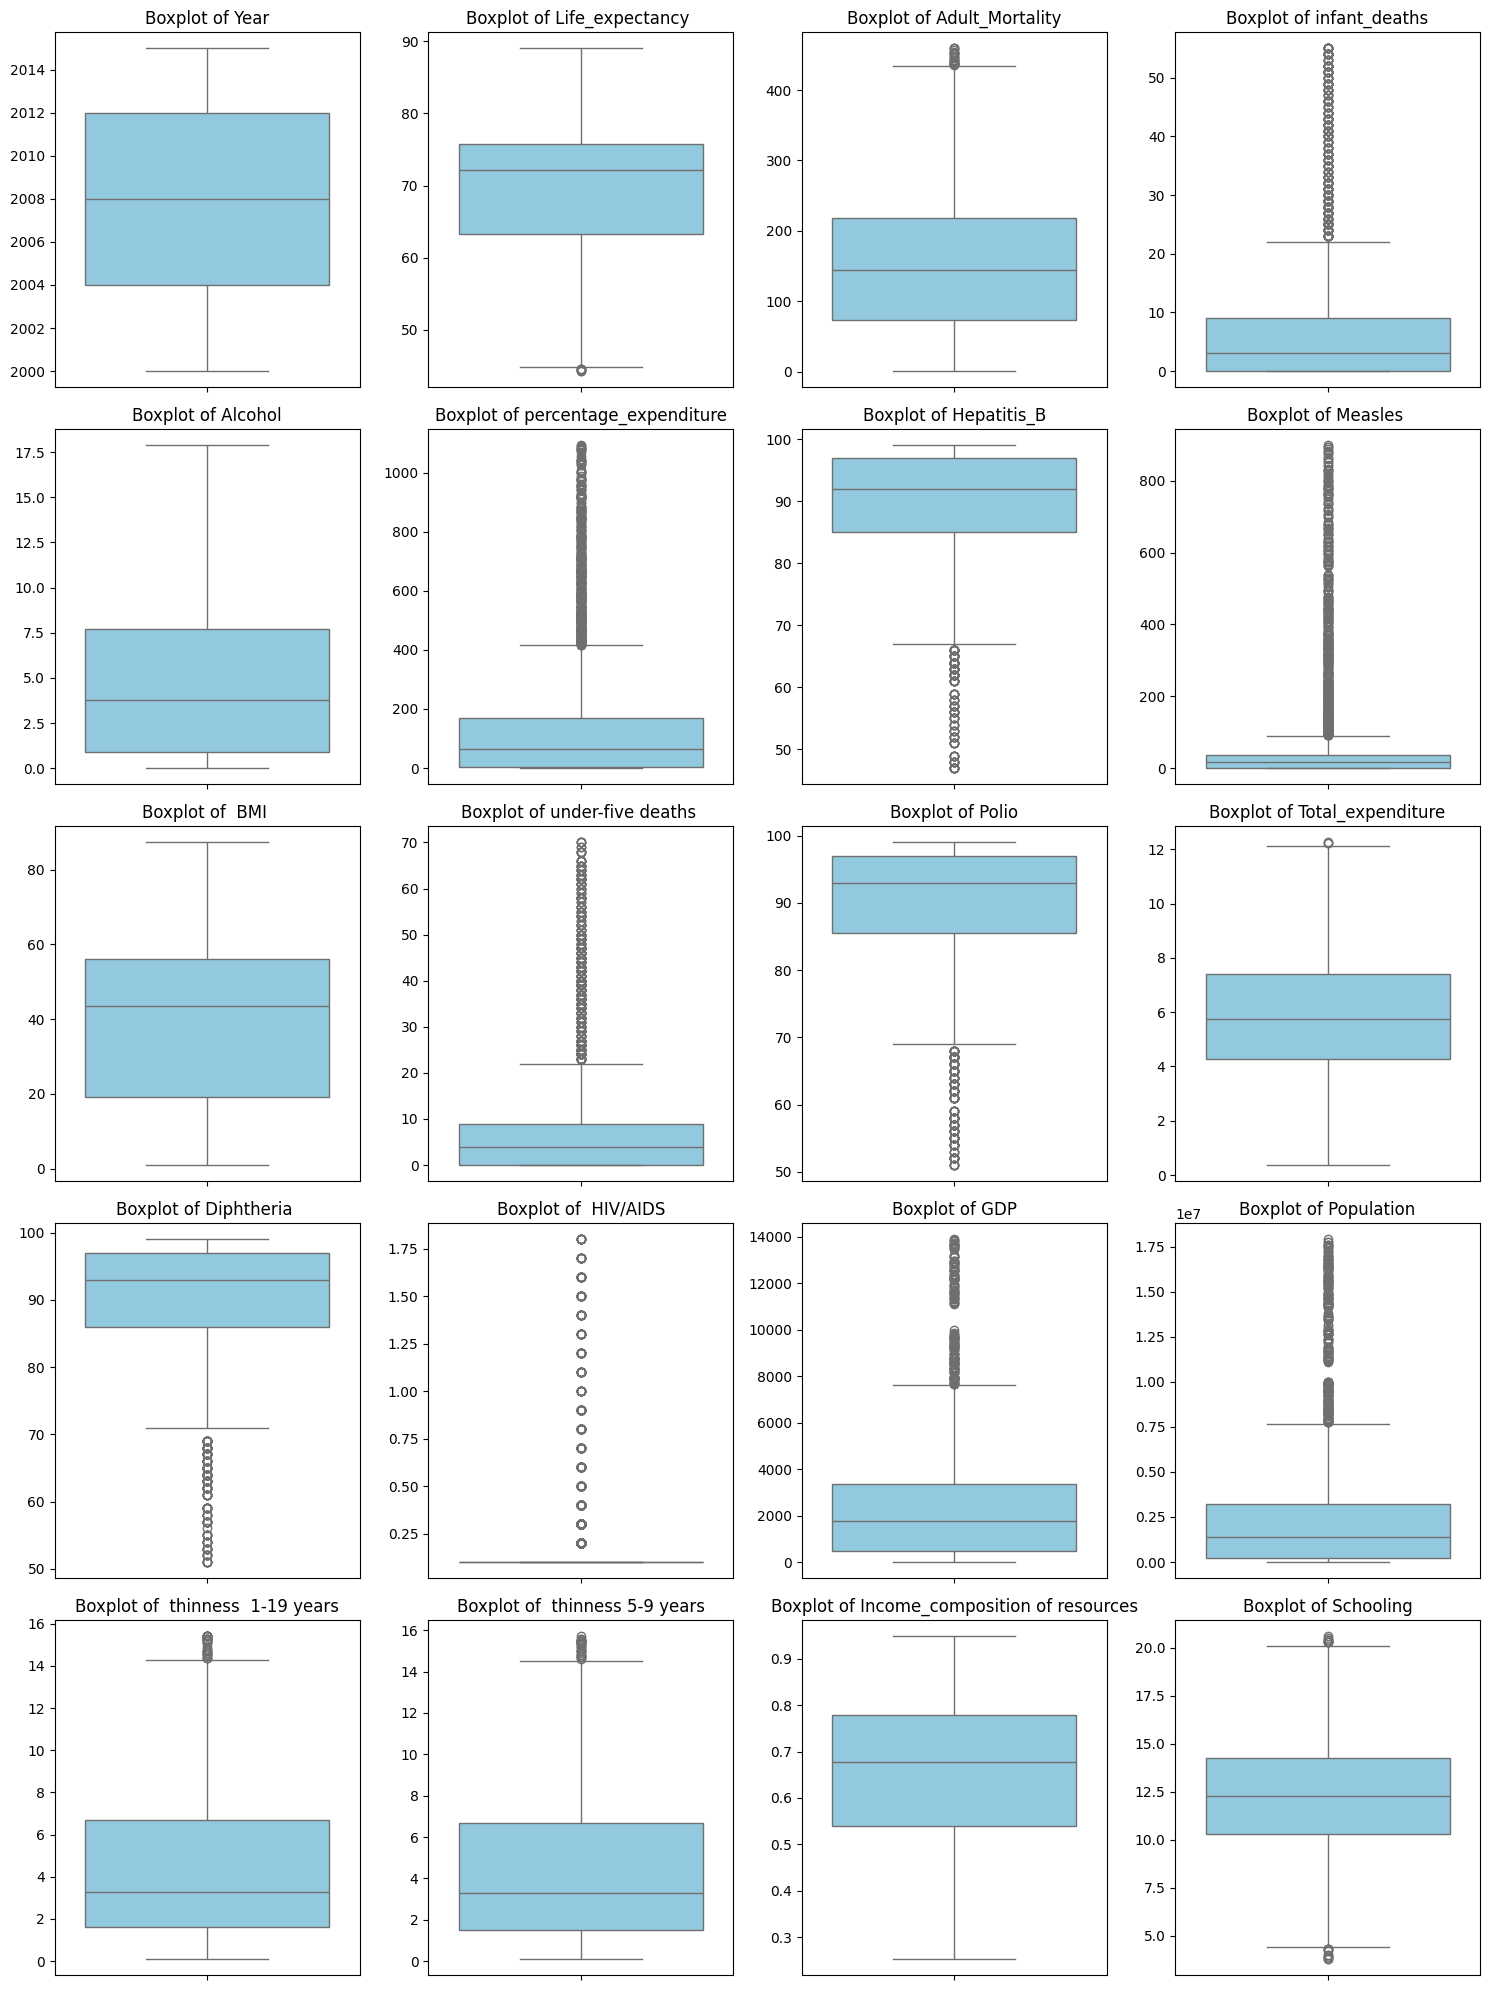

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for the first 20 numerical columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols[:20]):  # Select the first 20 numerical columns
    plt.subplot(5, 4, i + 1)  # Create subplots in a 5x4 grid
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()



##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [53]:
# Encode your categorical columns
df['Country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [54]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [55]:
# Columns to apply label encoding

cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder_df.fit_transform(df[col])

## Values After Handling

In [56]:
df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [57]:
df['Status'].unique()

array([1, 0])

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [61]:

X = df.drop('Life_expectancy ', axis=1)
y = df['Life_expectancy ']


In [62]:
X

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition of resources,Schooling,Immunization_coverage
0,0,2015.0,1,263.0,3.0,0.01,71.279624,65.0,17.0,19.1,...,8.16,65.0,0.1,584.259210,1386542.0,3.3,3.3,0.479,10.1,91.5
1,0,2014.0,1,271.0,3.0,0.01,73.523582,62.0,492.0,18.6,...,8.18,62.0,0.1,612.696514,327582.0,3.3,3.3,0.476,10.0,60.0
2,0,2013.0,1,268.0,3.0,0.01,73.219243,64.0,430.0,18.1,...,8.13,64.0,0.1,631.744976,1386542.0,3.3,3.3,0.470,9.9,63.0
3,0,2012.0,1,272.0,3.0,0.01,78.184215,67.0,17.0,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,3.3,3.3,0.463,9.8,67.0
4,0,2011.0,1,275.0,3.0,0.01,7.097109,68.0,17.0,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,3.3,3.3,0.454,9.5,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004.0,1,144.0,27.0,4.36,0.000000,68.0,31.0,27.1,...,7.13,65.0,0.1,454.366654,12777511.0,9.4,9.4,0.407,9.2,67.5
2934,192,2003.0,1,144.0,26.0,4.06,0.000000,92.0,17.0,26.7,...,6.52,68.0,0.1,453.351155,12633897.0,9.8,9.9,0.418,9.5,91.5
2935,192,2002.0,1,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,...,6.53,71.0,0.1,57.348340,125525.0,1.2,1.3,0.427,10.0,73.0
2936,192,2001.0,1,144.0,25.0,1.72,0.000000,76.0,529.0,25.9,...,6.16,75.0,0.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,76.0


### 6. Data Scaling

In [70]:
# Scaling your data
# Columns to scale
cols_to_scale = ['Country', 'Year', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total_expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition of resources', 'Schooling']

# Apply Min-Max scaling to the specified columns
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [71]:
X

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition of resources,Schooling,Immunization_coverage
0,0.0,1.000000,1,0.572052,0.054545,0.000000,0.065265,0.346154,0.018910,0.209733,...,0.655724,0.291667,0.0,0.041938,0.077461,0.209150,0.205128,0.325180,0.375000,91.5
1,0.0,0.933333,1,0.589520,0.054545,0.000000,0.067320,0.288462,0.547275,0.203940,...,0.657407,0.229167,0.0,0.043985,0.018299,0.209150,0.205128,0.320863,0.369048,60.0
2,0.0,0.866667,1,0.582969,0.054545,0.000000,0.067041,0.326923,0.478309,0.198146,...,0.653199,0.270833,0.0,0.045356,0.077461,0.209150,0.205128,0.312230,0.363095,63.0
3,0.0,0.800000,1,0.591703,0.054545,0.000000,0.071587,0.384615,0.018910,0.192352,...,0.686027,0.333333,0.0,0.048107,0.206538,0.209150,0.205128,0.302158,0.357143,67.0
4,0.0,0.733333,1,0.598253,0.054545,0.000000,0.006498,0.403846,0.018910,0.187717,...,0.631313,0.354167,0.0,0.004453,0.166405,0.209150,0.205128,0.289209,0.339286,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,0.266667,1,0.312227,0.490909,0.243561,0.000000,0.403846,0.034483,0.302433,...,0.569024,0.291667,0.0,0.032587,0.713844,0.607843,0.596154,0.221583,0.321429,67.5
2934,1.0,0.200000,1,0.312227,0.472727,0.226764,0.000000,0.865385,0.018910,0.297798,...,0.517677,0.354167,0.0,0.032514,0.705821,0.633987,0.628205,0.237410,0.339286,91.5
2935,1.0,0.133333,1,0.157205,0.454545,0.247480,0.000000,0.500000,0.338154,0.293163,...,0.518519,0.416667,0.0,0.004007,0.007011,0.071895,0.076923,0.250360,0.369048,73.0
2936,1.0,0.066667,1,0.312227,0.454545,0.095745,0.000000,0.557692,0.588432,0.288528,...,0.487374,0.500000,0.0,0.039370,0.690864,0.098039,0.102564,0.250360,0.357143,76.0


### 8. Data Splitting

In [104]:
# Split your data to train and test. Choose Splitting ratio wisely.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 22)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 22)
Shape of Y_test is: (588,)


## ***7. ML Model Implementation***

### ML Model - 1

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

class RidgeRegression():
    def __init__(self, learning_rate, iterations, l2_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penalty = l2_penalty

    # Function for model training
    def train(self, X_train, y_train):
        # Initialize coefficients
        self.coef_ = np.zeros(X_train.shape[1])
        self.intercept_ = 0

        # Gradient descent loop
        for _ in range(self.iterations):
            # Predicted values
            y_pred = np.dot(X_train, self.coef_) + self.intercept_

            # Gradient
            error = y_pred - y_train
            gradient_coef = 2 * np.dot(X_train.T, error) + 2 * self.l2_penalty * self.coef_
            gradient_intercept = 2 * np.mean(error)

            # Update coefficients
            self.coef_ -= self.learning_rate * gradient_coef
            self.intercept_ -= self.learning_rate * gradient_intercept

    # Function for prediction
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

# Load data
df = pd.read_csv('/content/drive/MyDrive/datasets/Life Expectancy Data.csv')

# Preprocess data
X = df.drop('Life_expectancy', axis=1)
y = df['Life_expectancy']
X = sm.add_constant(X)

# Initialize KFold cross-validation
kf = KFold(n_splits=5)

# Initialize lists to store results
rmse_list = []
r2_list = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model = RidgeRegression(learning_rate=0.001, iterations=1000, l2_penalty=0.1)
    model.train(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate and store evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Print average RMSE and R^2 across folds
print(f"Average RMSE across folds: {np.mean(rmse_list)}")
print(f"Average R^2 across folds: {np.mean(r2_list)}")

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy using Ridge Regression")
plt.show()


KeyError: "['Life_expectancy'] not found in axis"

In [149]:
print(df.columns)


Index(['Country', 'Year', 'Status', 'Life_expectancy ', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total_expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition of resources', 'Schooling'],
      dtype='object')


In [147]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### ML Model - 2

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

# **Conclusion**

Write the conclusion here.